в 5 лабе надо будет двигать и менять ширину УПЧ

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import convolve

1. Реализовать вейвлет Морле во временном пространстве $\psi(t)$. Посмотреть спектр.

    Реализовать вейвлет Морле в частотном пространстве ψ(ω). Это можно сделать используя обратное преобразование Фурье от ψ(t) или воспользоваться формулой (2).

Морле: $\psi(t) = e^{{-t^2}/{\alpha^2}} e^{i \omega_0 t}$  (1)

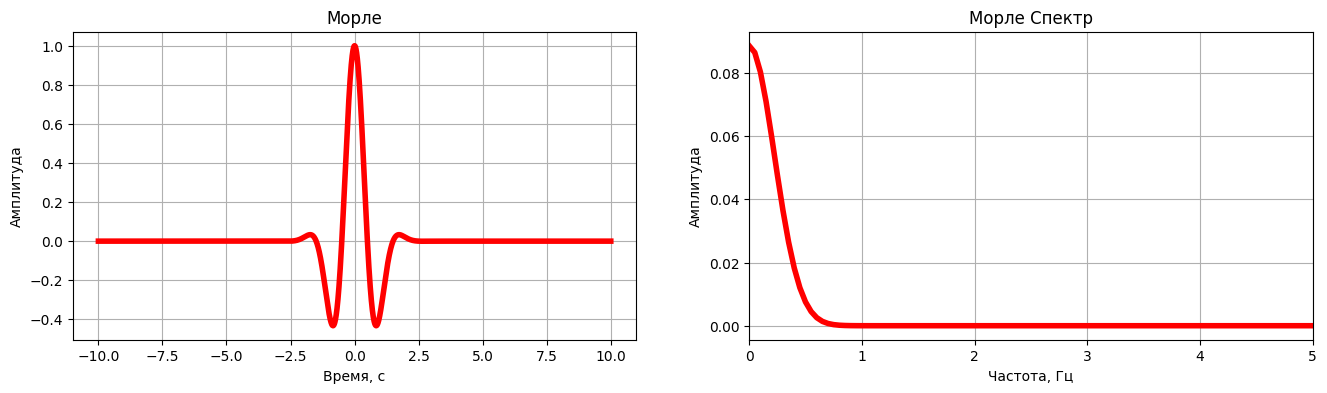

In [57]:
def wavelet_morlet(t, peak_freq=1.0, alpha=1.0):
    psi = np.exp(-t ** 2 / alpha ** 2) * np.exp(1j * np.pi * t * peak_freq)
    return psi


N = 5000
a, b = -10, 10
t = np.linspace(a, b, N)
y = wavelet_morlet(t)

yff = np.fft.rfft(np.abs(y))  # спектр
freq = np.fft.rfftfreq(N, np.abs(a - b) / N)

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(t, y, linewidth=4, color='red')
axs[0].set_title("Морле")
axs[0].set_xlabel('Время, с')
axs[0].set_ylabel('Амплитуда')
axs[1].plot(freq, np.abs(yff) / N * 2, linewidth=4, color='red')
axs[1].set_xlim(0, 5)  # увеличиваем масштаб
axs[1].set_title("Морле" + " Спектр")
axs[1].set_xlabel('Частота, Гц')
axs[1].set_ylabel('Амплитуда')
for ax in axs:
    ax.grid()
plt.show()

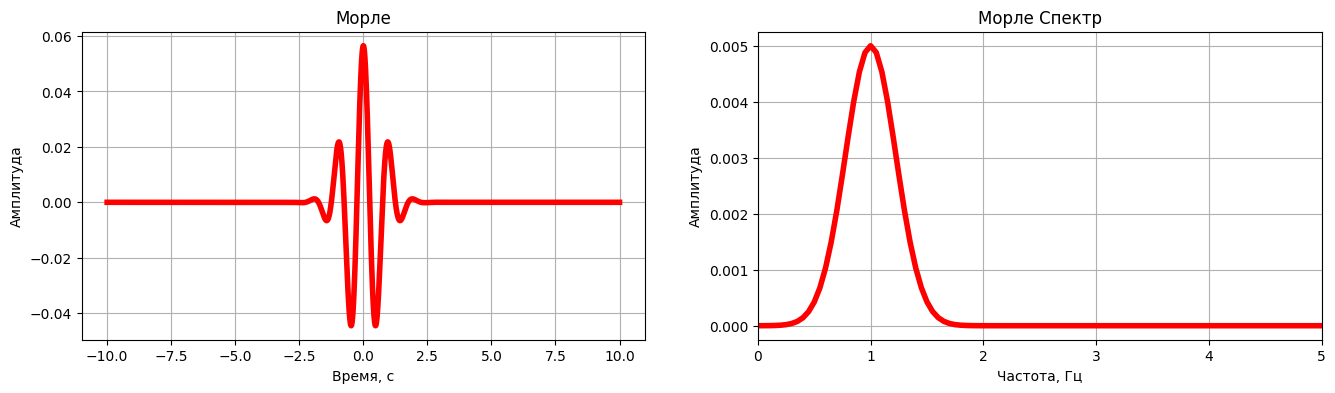

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def wavelet_morlet(t, peak_freq=1.0, alpha=1.0):
    psi = np.exp(-t ** 2 / alpha ** 2) * np.exp(2j * np.pi * t * peak_freq)
    return psi / np.sqrt(np.sum(np.abs(psi) ** 2))  # Нормализация

N = 5000
a, b = -10, 10
t = np.linspace(a, b, N)
dt = (b - a) / N
fs = 1 / dt  # Частота дискретизации
y = wavelet_morlet(t)

# Прямое преобразование Фурье для комплексного сигнала
yff = np.fft.fft(y)
freq = np.fft.fftfreq(N, dt)

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(t, y, linewidth=4, color='red')
axs[0].set_title("Морле")
axs[0].set_xlabel('Время, с')
axs[0].set_ylabel('Амплитуда')
axs[1].plot(freq[:N//2], np.abs(yff[:N//2]) / N, linewidth=4, color='red')
axs[1].set_xlim(0, 5)  # увеличиваем масштаб
axs[1].set_title("Морле" + " Спектр")
axs[1].set_xlabel('Частота, Гц')
axs[1].set_ylabel('Амплитуда')
for ax in axs:
    ax.grid()
plt.show()

2. Реализовать вейвлет "Мексиканская шляпа" и Хаара во временном пространстве. Посмотреть спектр.

Морле: $\psi(t) = e^{{-t^2}/{\alpha^2}} e^{i \omega_0 t}$

"Мексиканская шляпа": $(1 - t^2) * e^{-t^2 / 2}$

Хаара: $\begin{cases}
  1,  x \in [ 0, \frac{T}{2} ) \\
 -1, x \in [ \frac{T}{2}, 1 ) \\
  0,  otherwise \\
\end{cases}$

In [5]:
def wavelet_morlet(t, peak_freq=1.0, alpha=1.0):
    psi = np.exp(-t ** 2 / alpha ** 2) * np.exp(1j * np.pi * t * peak_freq)
    return psi  #/ np.sqrt(np.sum(np.abs(psi) ** 2))  # Нормализация


def wavelet_mhat(t, peak_freq=0.0):
    psi = (1 - t ** 2) * np.exp(-t ** 2 / 2) * np.exp(2j * np.pi * t * peak_freq)
    return psi / np.sqrt(np.sum(np.abs(psi) ** 2))  # Нормализация


def wavelet_haar(t, peak_freq=1.0, T=1, shift=0):
    t_scaled = t * peak_freq
    return np.array([1 if (t_scaled >= shift) and (t_scaled < T / 2 + shift) else -1 if (
                                                                                                t_scaled >= T / 2 + shift) and (
                                                                                                t_scaled < T + shift)
    else 0 for t_scaled in np.nditer(t_scaled)])


wavelets = {
    "morlet": {
        "func": wavelet_morlet,
        "num": 5000,
        "t": np.linspace(-10, 10, 5000),
        "name": 'morlet',
        "params": {"alpha": 1.0, "peak_freq": 1.0},
        "line_style": (5, (10, 3)),
        "line_width": 4,
        "color": "red"
    },
    "mhat": {
        "func": wavelet_mhat,
        "num": 5000,
        "t": np.linspace(-10, 10, 5000),
        "name": 'mhat',
        "params": {},
        "line_style": (0, (1, 1)),
        "line_width": 4,
        "color": "green"
    },
    "haar": {
        "func": wavelet_haar,
        "num": 5000,
        "t": np.linspace(-2, 5, 5000),
        "name": 'haar',
        "params": {"T": 3, "shift": 0},
        "line_style": "--",
        "line_width": 2,
        "color": "blue"
    },
}

for wavelet in wavelets.values():
    y = wavelet["func"](wavelet["t"], **wavelet["params"])
    freq = np.fft.rfftfreq(len(wavelet["t"]), d=(wavelet["t"][1] - wavelet["t"][0]))
    yff = np.fft.rfft(y)
    wavelet["y"] = y
    wavelet["freq"] = freq
    wavelet["yff"] = yff
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))
    axs[0].plot(wavelet["t"], y, linewidth=4, color=wavelet["color"])
    axs[0].set_title(wavelet["name"])
    axs[0].set_xlabel('Время (с)')
    axs[0].set_ylabel('Амплитуда')
    axs[1].plot(freq, np.abs(yff) / wavelet["num"] * 2, linewidth=4, color=wavelet["color"])
    axs[1].set_xlim(0, 5)
    axs[1].set_title(wavelet["name"] + " (Спектр)")
    axs[1].set_xlabel('Частота (Гц)')
    axs[1].set_ylabel('Амплитуда')
    plt.show()

TypeError: ufunc 'rfft_n_even' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''